Mean Squared Error: 0.2028039378253426
R-squared: 0.8466291011772226


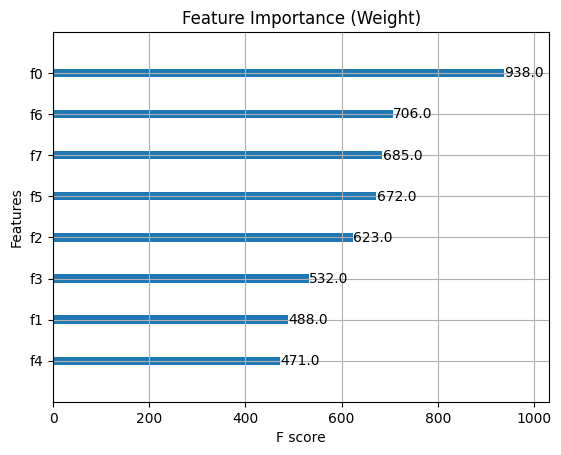

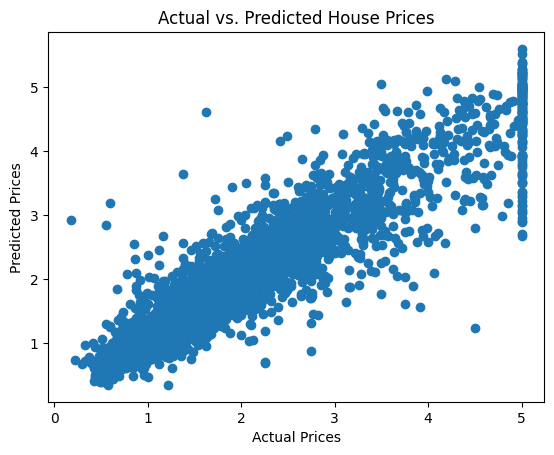

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

# Load the California Housing Prices dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Split the dataset into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Build and train the GBNN model using XGBoost with CPU
gbnn_model = xgb.XGBRegressor(
    objective="reg:squarederror",
    n_estimators=100
)

gbnn_model.fit(X_train, y_train)

# Predict using the GBNN model
y_pred = gbnn_model.predict(X_test)

# Evaluate the GBNN model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Visualize feature importance
xgb.plot_importance(gbnn_model, importance_type='weight', title='Feature Importance (Weight)')
plt.show()

# Visualize predicted vs. actual house prices
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted House Prices')
plt.show()
